In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import csv
import datetime as dt
import pandas as pd
from datetime import datetime

In [10]:
df = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv'\
                )[['DATE_OF_INTEREST','CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']]

In [11]:
df['DATE_OF_INTEREST']= pd.to_datetime(df['DATE_OF_INTEREST'])
df.set_index(['DATE_OF_INTEREST'])
df

,DATE_OF_INTEREST,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,2020-02-29,1,0,0
1,2020-03-01,0,0,0
2,2020-03-02,0,0,0
3,2020-03-03,1,1,0
4,2020-03-04,5,2,0
5,2020-03-05,3,8,0
6,2020-03-06,8,5,0
7,2020-03-07,7,6,0
8,2020-03-08,21,15,0
9,2020-03-09,57,30,0


In [8]:
w = open('COVID_cases_daily.csv', 'w')
toWrite = df.to_csv(index=False)
w.write(toWrite)
w.close()

In [12]:
df.index = pd.to_datetime(df['DATE_OF_INTEREST'], format='%Y-%m-%d')
covid_months = df.groupby(by=[df.index.month]).sum()
covid_months

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2,1,0,0
3,65191,18060,2189
4,109314,29695,12731
5,28459,4270,2829
6,10883,1592,755
7,9834,1180,334
8,7478,972,135
9,10366,918,126
10,16848,1549,159


In [13]:
d = covid_months.to_dict()
cases = d['CASE_COUNT']
cases = list(cases.values())

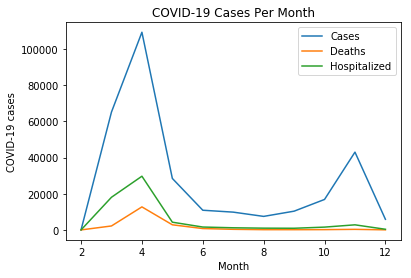

In [14]:
fig, ax = plt.subplots()
data = d['CASE_COUNT']
names = list(data.keys())
cases_values = list(data.values())
deaths_values = list(d['DEATH_COUNT'].values())
hosp_values = list(d['HOSPITALIZED_COUNT'].values())

ax.set_title('COVID-19 Cases Per Month')
ax.set_ylabel('COVID-19 cases')
ax.set_xlabel('Month')

ax.plot(names, cases_values, label='Cases')
ax.plot(names, deaths_values, label='Deaths')
ax.plot(names, hosp_values, label='Hospitalized')
ax.legend()

plt.show()